# D(St)reams of Anomalies

### __1. INDUSTRY__ 

__Twitter__ is assigned.

### __2. DATA SETS__

__2.1. SOURCE__: The dataset is from [Github](https://github.com) in [this link](https://github.com/numenta/NAB/tree/master/data).

__DESCRIPTION__: The datasets contains data related to datetime and number of tweets on Apple. The following attributes from the datasets will be used for analysis.

|Attribute       | Datatype     |
| :------------- | ----------: |
| timestamp | datetime   |
| value   | int64 ||

### __3. IDEAS__

__3.1.__ To determine the outliers for number of tweets using IQR and K-Means.

__3.2.__ To determine the outliers using SVM and isolation forest.

### __4. LOADING THE DATASETS__

__Load the libraries__

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

__Import the csv files of dataset__

In [2]:
tweet_data = pd.read_csv('/Users/madhumithrasubramaniankarthikesh/Downloads/Twitter_volume_AAPL.csv', parse_dates = ['timestamp'], index_col = ['timestamp'])
tweet_data.head()

,value
timestamp,
2015-02-26 21:42:53,104
2015-02-26 21:47:53,100
2015-02-26 21:52:53,99
2015-02-26 21:57:53,154
2015-02-26 22:02:53,120


### __5. DATA PREPARATION__

__5.1 DATA CLEANING AND FEATURE ENGINEERING__

__Shape of all the data__

In [3]:
print("Shape of products: "+str(tweet_data.shape))

Shape of products: (15902, 1)


__Information about dataset__

In [4]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15902 entries, 2015-02-26 21:42:53 to 2015-04-23 02:47:53
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   15902 non-null  int64
dtypes: int64(1)
memory usage: 248.5 KB


__Statistical description of the tweets__

In [5]:
tweet_data['value'].describe()

count    15902.000000
mean        85.552320
std        321.050721
min          0.000000
25%         29.000000
50%         47.000000
75%         76.000000
max      13479.000000
Name: value, dtype: float64

__5.2 DATA VISUALIZATION__

__5.2.1 Days vs tweets__

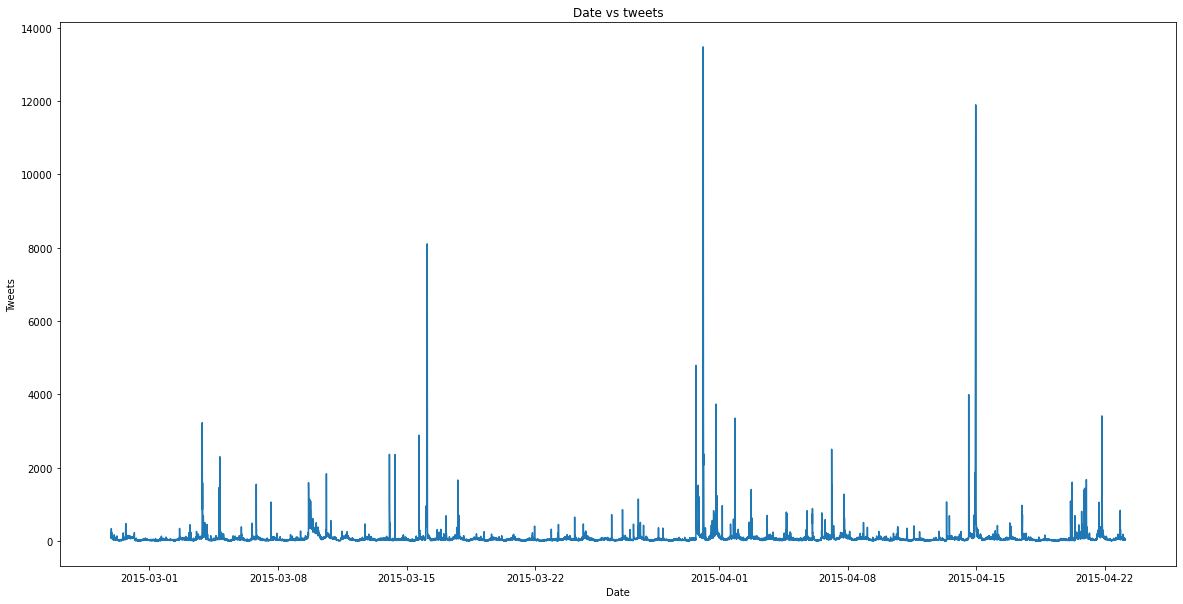

In [6]:
plt.figure(figsize=(20,10))
plt.xlabel('Date')
plt.ylabel('Tweets')
plt.title('Date vs tweets')
plt.plot(tweet_data.index,tweet_data['value']);

There is no definite pattern observed on number of tweets.Three anomalies are clearly visible with value at 8000, 13000 and 12000.

__5.2.2 Distribution plot of the tweets__

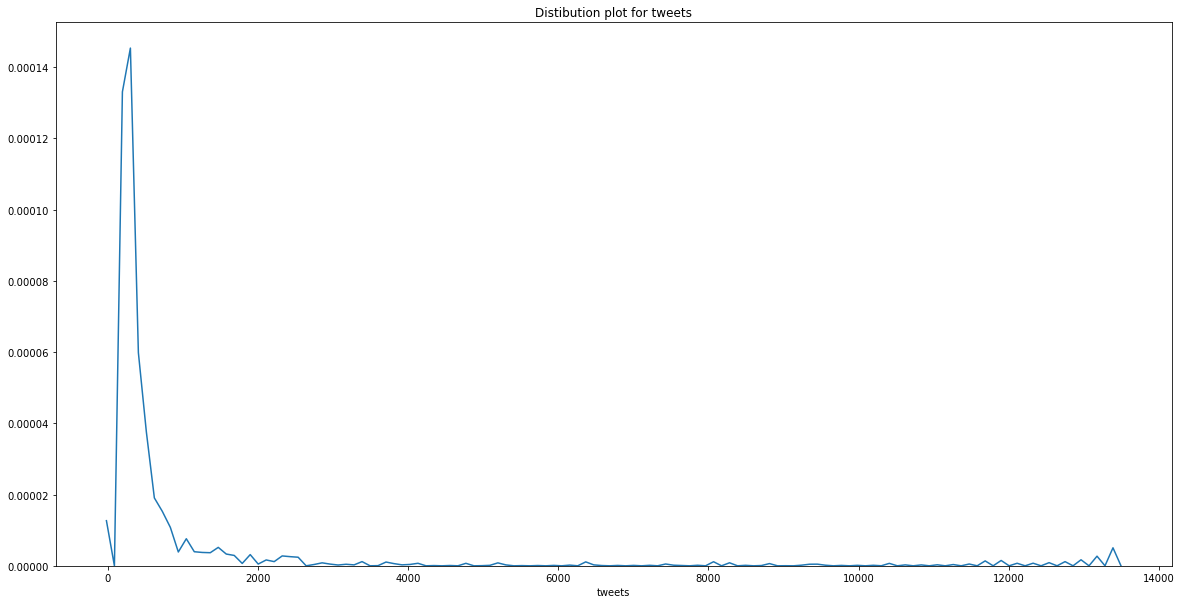

In [7]:
import seaborn as sns
plt.figure(figsize=[20,10])
sns.distplot(tweet_data['value'], hist=False)
plt.title('Distibution plot for tweets')
plt.xlabel('tweets')
plt.show()

The number of tweets above 2000 can be considered as outliers.

__5.2.3 Violin plot for tweets__

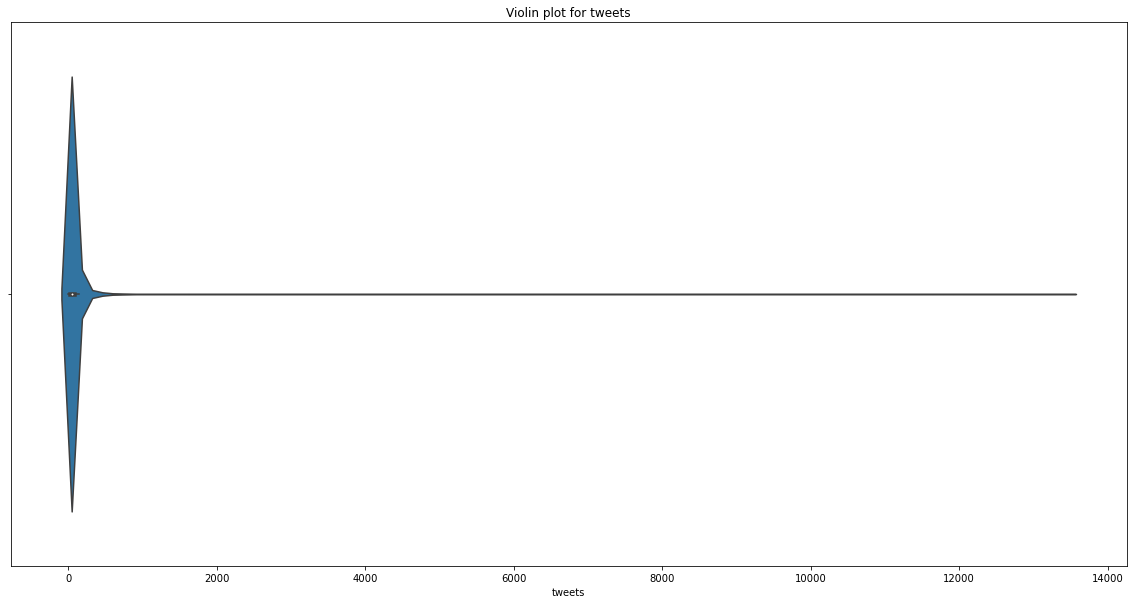

In [8]:
plt.figure(figsize=[20,10])
sns.violinplot(x=tweet_data['value'])
plt.title('Violin plot for tweets')
plt.xlabel('tweets')
plt.show()

The number of tweets greater than 1000 are outliers.

__5.2.4 Box plot for tweets__

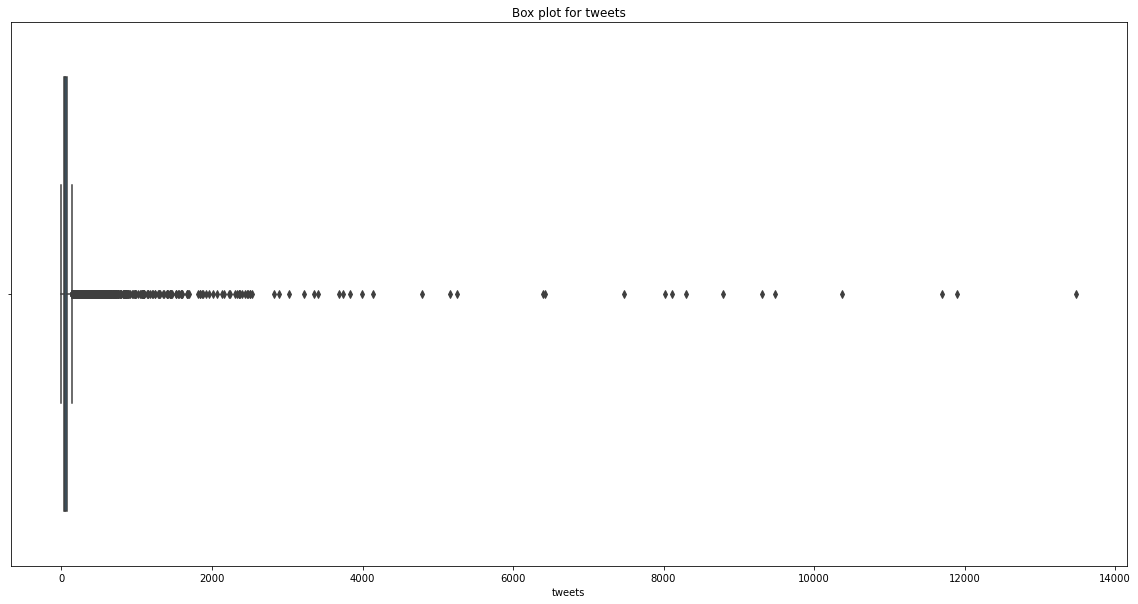

In [9]:
plt.figure(figsize=[20,10])
sns.boxplot(x=tweet_data['value'])
plt.title('Box plot for tweets')
plt.xlabel('tweets')
plt.show()

The number of tweets greater than 500 can even be considered as outliers.

__5.2.5 Seasonal Decomposition__

<Figure size 432x288 with 0 Axes>

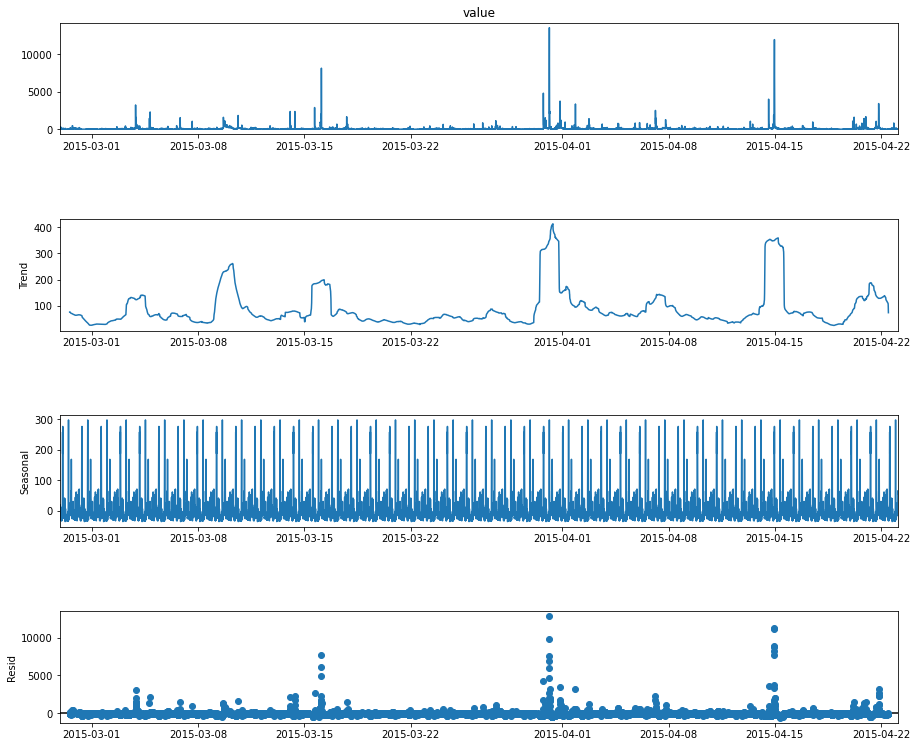

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(tweet_data['value'], model='additive',period=365)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 12)

__5.3 ANOMALY DETECTION__

__5.3.1 Interquartile Range__

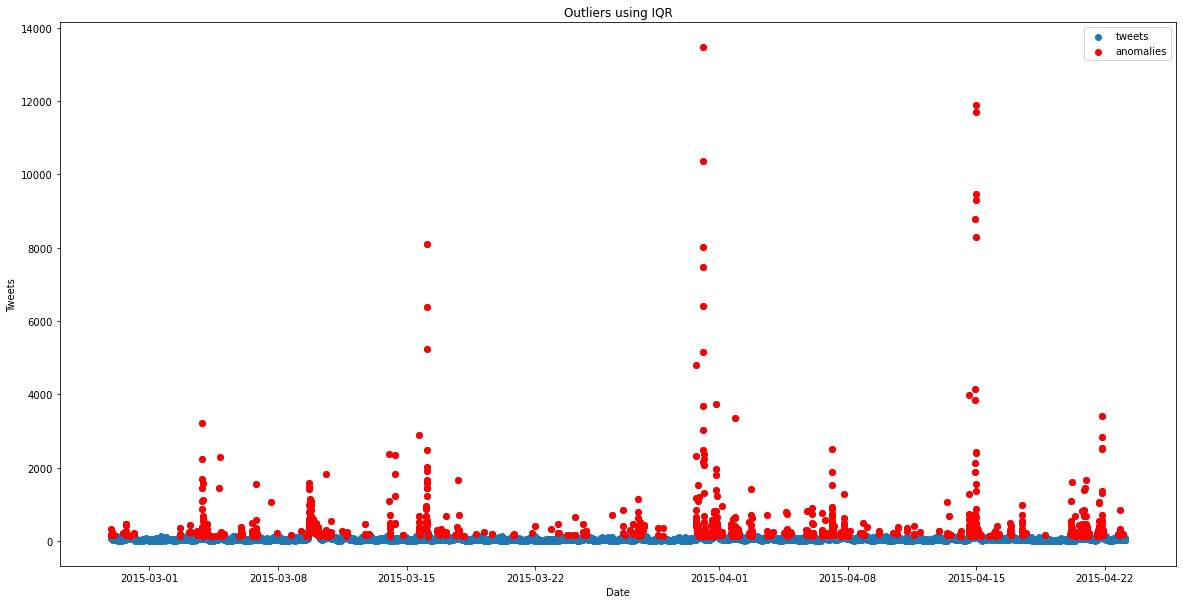

In [11]:
Q3=76;
Q1=29;
IQR = Q3 - Q1;
lower_range = Q1 - (1.5 * IQR)
upper_range = Q3 + (1.5 * IQR)
t=tweet_data;
t['outlier']=1;
t.loc[(t.value < lower_range) | (t.value > upper_range), 'outlier'] = -1;
t_=t[t["outlier"] == -1]
plt.figure(figsize=[20,10])
plt.scatter(t.index, t['value'],label='tweets')
plt.scatter(t_.index, t_.value, color='r', label='anomalies')
plt.legend()
plt.title('Outliers using IQR')
plt.xlabel('Date')
plt.ylabel('Tweets')
plt.show()

The IQR finds only the anomalies in high values.

__5.3.2 KMeans to find anomalies__

/Users/madhumithrasubramaniankarthikesh/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


Number of values greater than one standard deviation 410


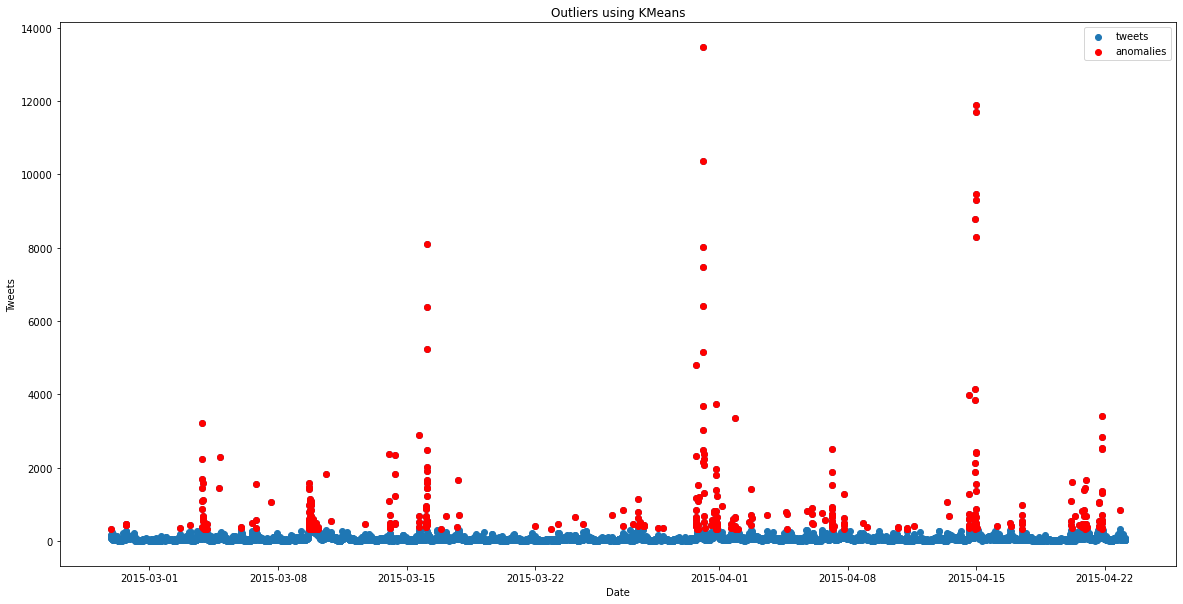

In [12]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder

t=tweet_data.reset_index()
# print(t)
del t['timestamp']

kmeans = KMeans(n_clusters = 1)
kmeans.fit(t)
center = kmeans.cluster_centers_
t['distance']=np.sqrt((t['value'] - center[0][0])**2)
t['time']=tweet_data.index
t_ = t.sort_values(by=['distance'],ascending=False)

#considering above one std as anomaly
print("Number of values greater than one standard deviation",len(t_.loc[t_['value'] > 321])) 

plt.figure(figsize=[20,10])
plt.scatter(t.time, t['value'],label='tweets')
plt.scatter(t_[:410].time, t_[:410].value, color='r',label='anomalies')
plt.legend()
plt.title('Outliers using KMeans')
plt.xlabel('Date')
plt.ylabel('Tweets')
plt.show()

The K-Means also finds only the anomalies in high values when considering one standard deviation

__5.3.3 Isolation forest to detect anomalies__

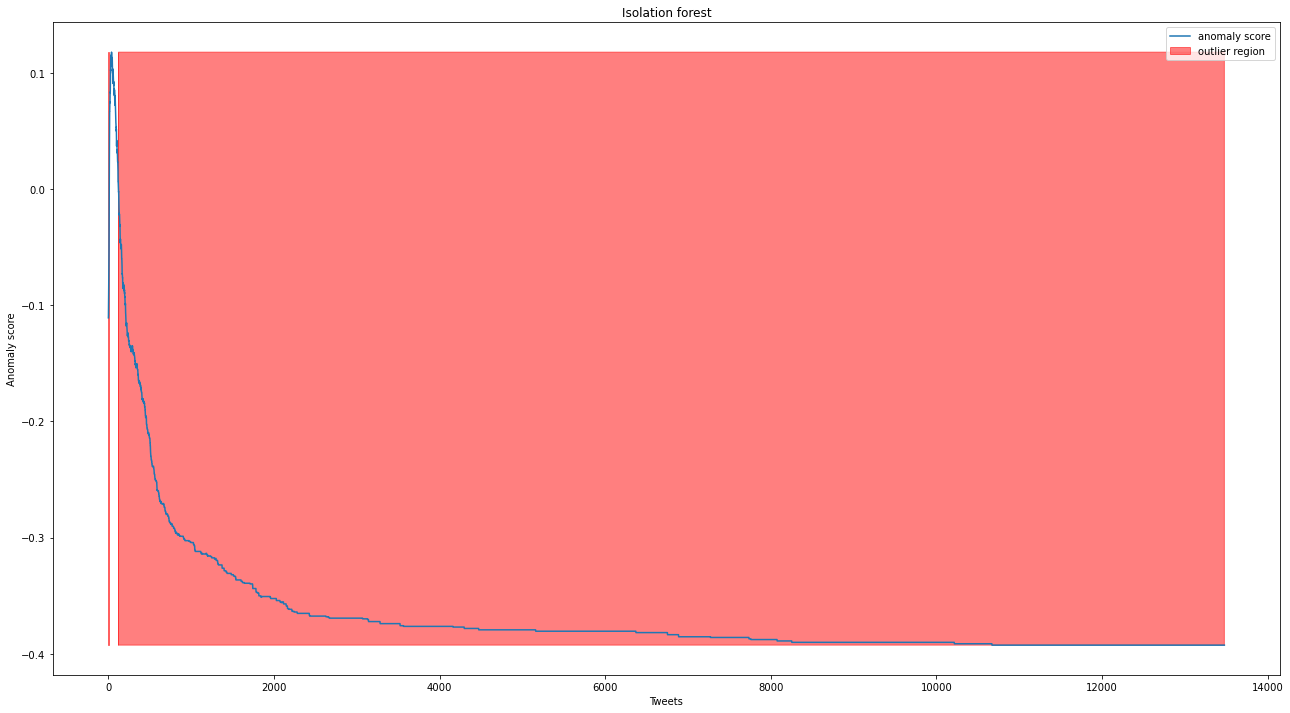

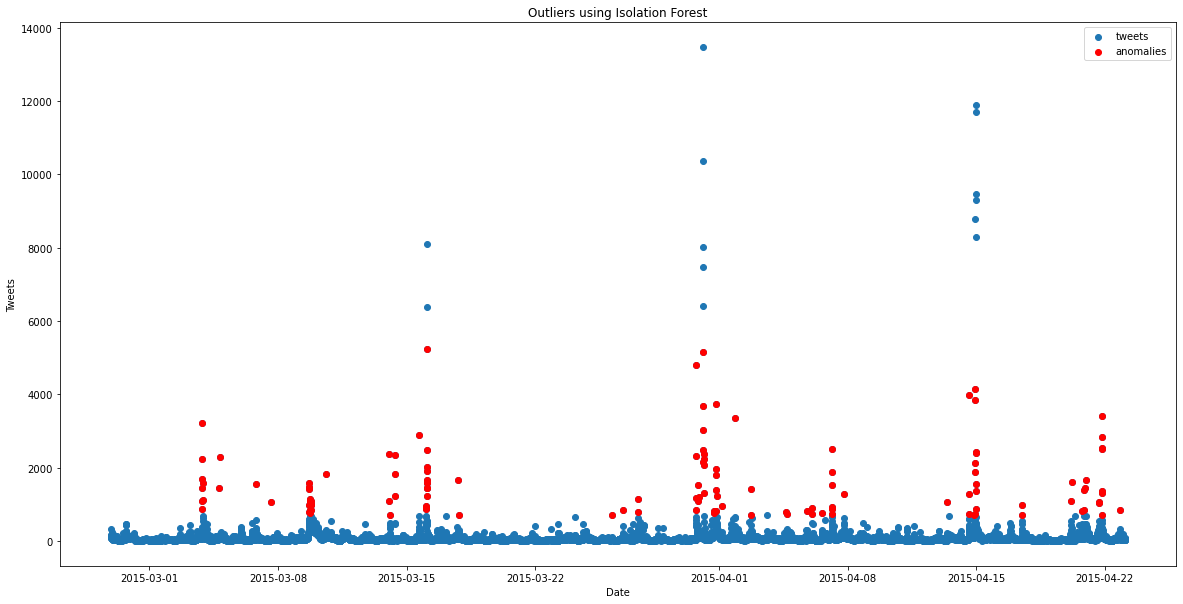

Number of outliers as estimated : 144
Accuracy percentage: 90.97222222222223


In [13]:
from sklearn.ensemble import IsolationForest
plt.figure(figsize=(22, 12), facecolor='w', edgecolor='k')


isolation_forest = IsolationForest()
isolation_forest.fit(tweet_data['value'].values.reshape(-1,1))

xx = np.linspace(tweet_data['value'].min(), tweet_data['value'].max(), len(tweet_data)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.5, label='outlier region')
plt.legend()
plt.title('Isolation forest');
plt.xlabel('Tweets');
plt.ylabel('Anomaly score');

t=tweet_data;
t=t.sort_values(by='value', ascending=False)
t['outlier']=outlier;

t_=t[t["outlier"] == 1]
plt.figure(figsize=[20,10])
plt.scatter(t.index, t['value'],label='tweets')
plt.scatter(t_.index, t_.value, color='r',label='anomalies')
plt.legend()
plt.title('Outliers using Isolation Forest')
plt.xlabel('Date')
plt.ylabel('Tweets')
plt.show()


anomaly=t.loc[t['outlier']==1]
outliers_counter = len(t[t['value'] > anomaly.value.min()])
print("Number of outliers as estimated :",outliers_counter)
print("Accuracy percentage:", 100*list(t['outlier']).count(1)/(outliers_counter))

__5.3.4 One Class SVM__

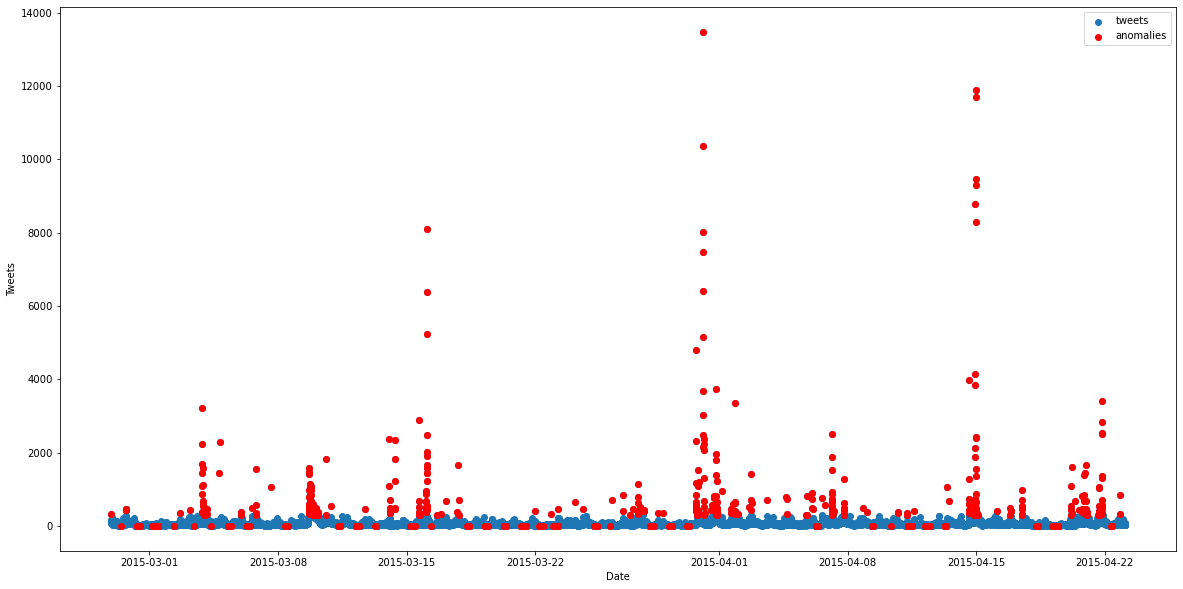

Correctly fitted
Raw scores : [430.83715219 430.40821058 430.29220265 ... 419.36829067 411.398351
 415.99948652]


In [14]:
from sklearn.svm import OneClassSVM
svm = OneClassSVM(kernel='rbf', gamma='scale', nu=0.05).fit(tweet_data['value'].values.reshape(-1,1))
pred = svm.predict(tweet_data['value'].values.reshape(-1,1))
anom_index = np.where(pred==-1)
t=tweet_data.reset_index()
values = list([t.iloc[index] for index in anom_index])
values[0].value
plt.figure(figsize=[20,10])
plt.scatter(tweet_data.index, tweet_data['value'],label='tweets')
plt.scatter(values[0].timestamp, values[0]['value'], color='r',label='anomalies')
plt.xlabel('Date')
plt.ylabel('Tweets')
plt.legend()
plt.show()
if svm.fit_status_==0:
    print("Correctly fitted");
    print("Raw scores :",svm.score_samples(tweet_data['value'].values.reshape(-1,1)))
else:
    print("Not correctly fitted");